In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [3]:
data = pd.read_csv("C:\\Users\\aryash\\Documents\\911.csv")

In [4]:
column = ['latitude', 'longitude', 'description', 'zipcode', 'title', 'timestamp'
          , 'township', 'address', 'e']
data.columns = column
print(data.head())

    latitude  longitude                                        description  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

   zipcode                    title            timestamp           township  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 17:40:01   LOWER POTTSGROVE   

                      address  e  
0      REINDEER CT & 

In [5]:
data.drop('e', axis=1, inplace=True)

In [6]:
print(data.info())
pd.set_option("display.float_format", "{:.2f}".format)
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   latitude     99492 non-null  float64
 1   longitude    99492 non-null  float64
 2   description  99492 non-null  object 
 3   zipcode      86637 non-null  float64
 4   title        99492 non-null  object 
 5   timestamp    99492 non-null  object 
 6   township     99449 non-null  object 
 7   address      98973 non-null  object 
dtypes: float64(3), object(5)
memory usage: 6.1+ MB
None
       latitude  longitude  zipcode
count  99492.00   99492.00 86637.00
mean      40.16     -75.32 19237.66
std        0.09       0.17   345.34
min       30.33     -95.60 17752.00
25%       40.10     -75.39 19038.00
50%       40.15     -75.30 19401.00
75%       40.23     -75.21 19446.00
max       41.17     -75.00 77316.00


In [7]:
print(data.isnull().sum())



latitude           0
longitude          0
description        0
zipcode        12855
title              0
timestamp          0
township          43
address          519
dtype: int64


In [8]:
#Inserting a new column
data['station_num'] = data.description.str.split('Station', expand=True)[1].str.split(';', expand=True)[0]
data.head()

,latitude,longitude,description,zipcode,title,timestamp,township,address,station_num
0,40.30,-75.58,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.00,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,332
1,40.26,-75.26,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.00,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,345
2,40.12,-75.35,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.00,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,:STA27
3,40.12,-75.34,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.00,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,308A
4,40.25,-75.60,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,329


<BarContainer object of 10 artists>

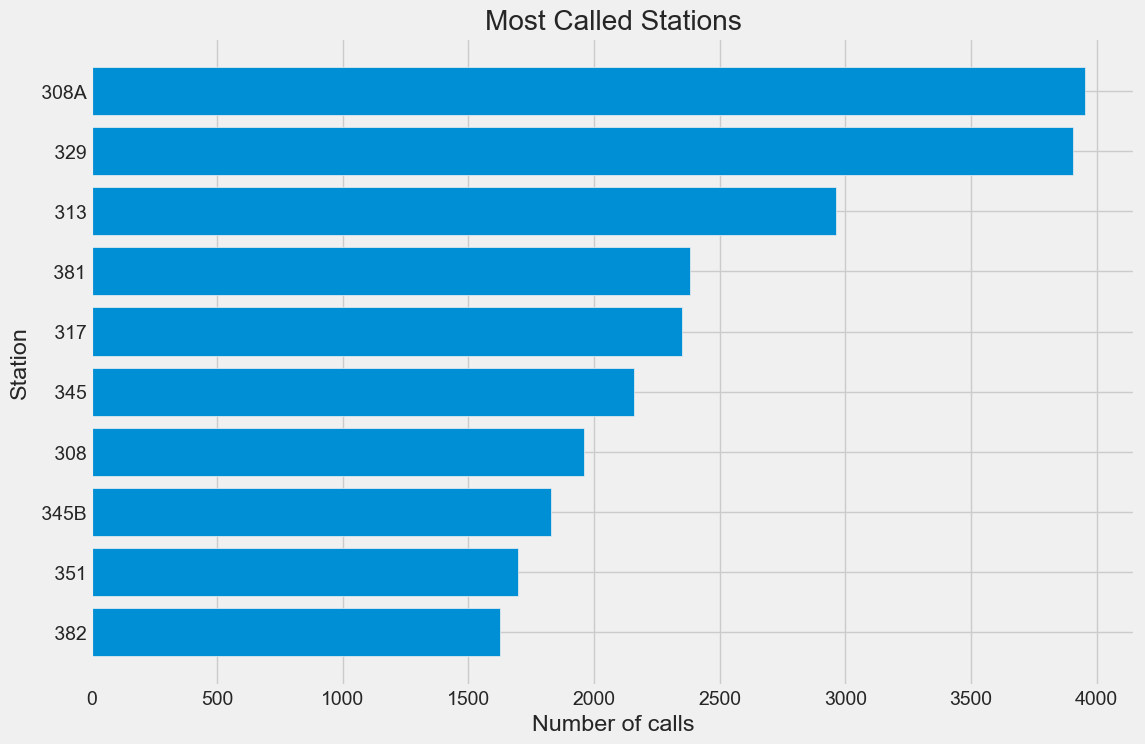

In [9]:
df = data.station_num.str.replace(':', '').value_counts()[:10]
plt.figure(figsize=(12, 8))
x = list(df.index)
y = list(df.values)
x.reverse()
y.reverse()

plt.title("Most Called Stations")
plt.ylabel("Station")
plt.xlabel("Number of calls")

plt.barh(x, y)

In [10]:
#Inserting a new column
data['Reason_category'] = data.title.str.split(':', expand=True)[0]
data['Reason'] = data.title.str.split(':', expand=True)[1].str.replace(' -', '')

In [11]:
#counting reasons
print(data.Reason.value_counts())

Reason
VEHICLE ACCIDENT         28639
DISABLED VEHICLE          7703
FIRE ALARM                5510
RESPIRATORY EMERGENCY     5112
CARDIAC EMERGENCY         5012
                         ...  
PLANE CRASH                  2
POLICE INFORMATION           2
ACTIVE SHOOTER               2
SUSPICIOUS                   2
BOMB DEVICE FOUND            1
Name: count, Length: 76, dtype: int64


<BarContainer object of 10 artists>

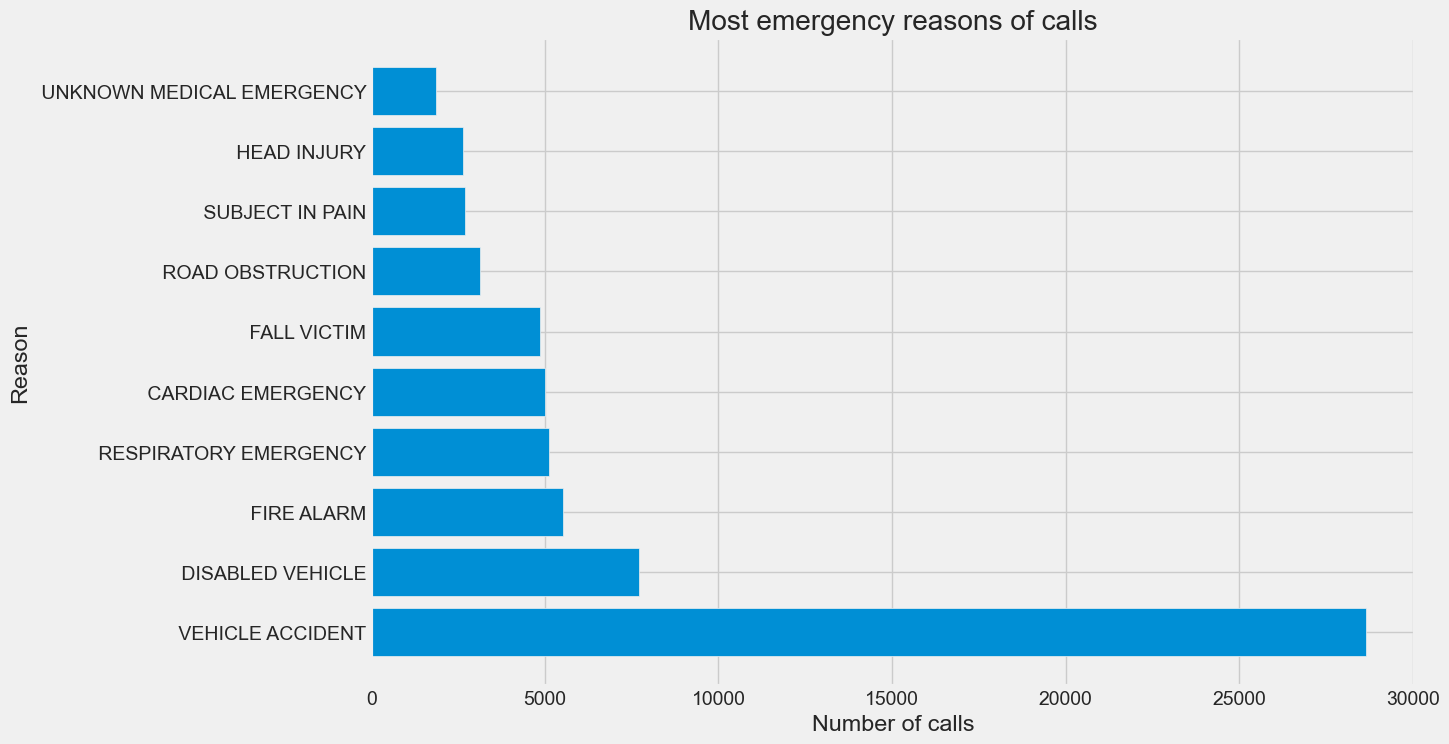

In [12]:
df = data.Reason.value_counts()[:10]
plt.figure(figsize=(12, 8))
x = list(df.index)
y = list(df.values)

plt.title("Most emergency reasons of calls")
plt.ylabel("Reason")
plt.xlabel("Number of calls")

plt.barh(x, y)

<Axes: xlabel='Reason_category', ylabel='count'>

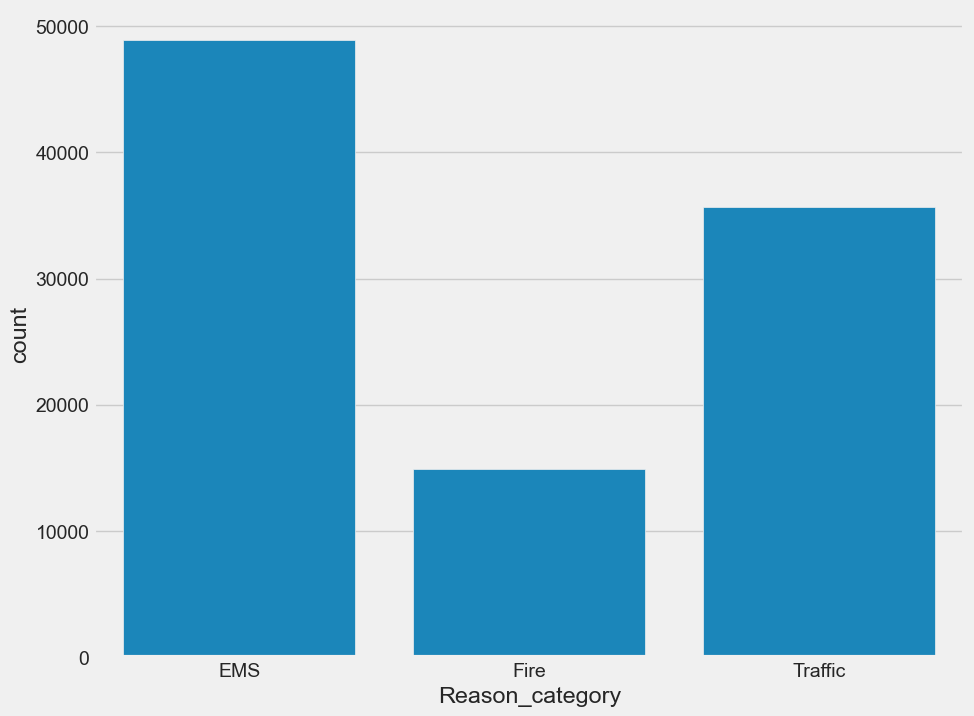

In [13]:
#Now using seaborn to visualize
plt.figure(figsize=(10, 8))
sns.countplot(x=data.Reason_category, data=data,)

In [14]:
# Now visualizing the timestamp column
data['timestamp'] = pd.to_datetime(data.timestamp)
data['Hour'] = data.timestamp.dt.hour
data['Month'] = data.timestamp.dt.month
data['DayOfWeek'] = data.timestamp.dt.weekday
print(data.head())

   latitude  longitude                                        description  \
0     40.30     -75.58  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1     40.26     -75.26  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2     40.12     -75.35  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3     40.12     -75.34  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4     40.25     -75.60  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

   zipcode                    title           timestamp           township  \
0 19525.00   EMS: BACK PAINS/INJURY 2015-12-10 17:40:00        NEW HANOVER   
1 19446.00  EMS: DIABETIC EMERGENCY 2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2 19401.00      Fire: GAS-ODOR/LEAK 2015-12-10 17:40:00         NORRISTOWN   
3 19401.00   EMS: CARDIAC EMERGENCY 2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 17:40:01   LOWER POTTSGROVE   

                      address station_num Reason_category  \
0      

In [15]:
#The Description column feature is not Useful Anymore
data.drop('description', axis=1, inplace=True)

In [16]:
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
data['DayOfWeek'] = data.DayOfWeek.map(dmap)
data.DayOfWeek.value_counts()

DayOfWeek
Tue    15150
Wed    14879
Fri    14833
Mon    14680
Thu    14478
Sat    13336
Sun    12136
Name: count, dtype: int64

<Axes: xlabel='DayOfWeek', ylabel='count'>

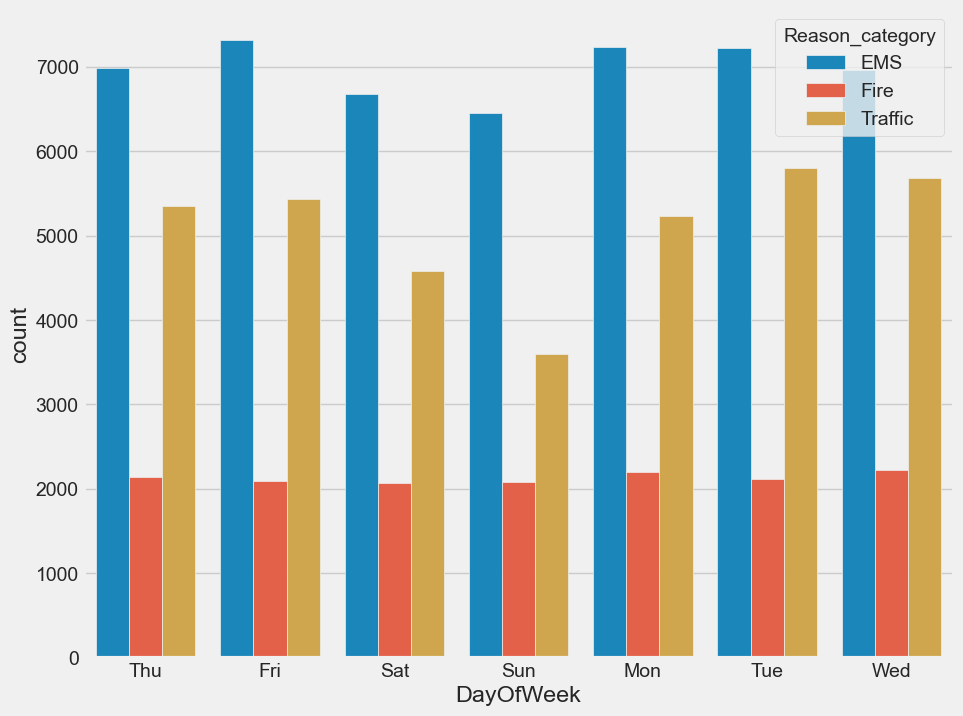

In [17]:
plt.figure(figsize=(10, 8))
sns.countplot(x=data.DayOfWeek, data=data, hue='Reason_category')

<Axes: xlabel='Month', ylabel='count'>

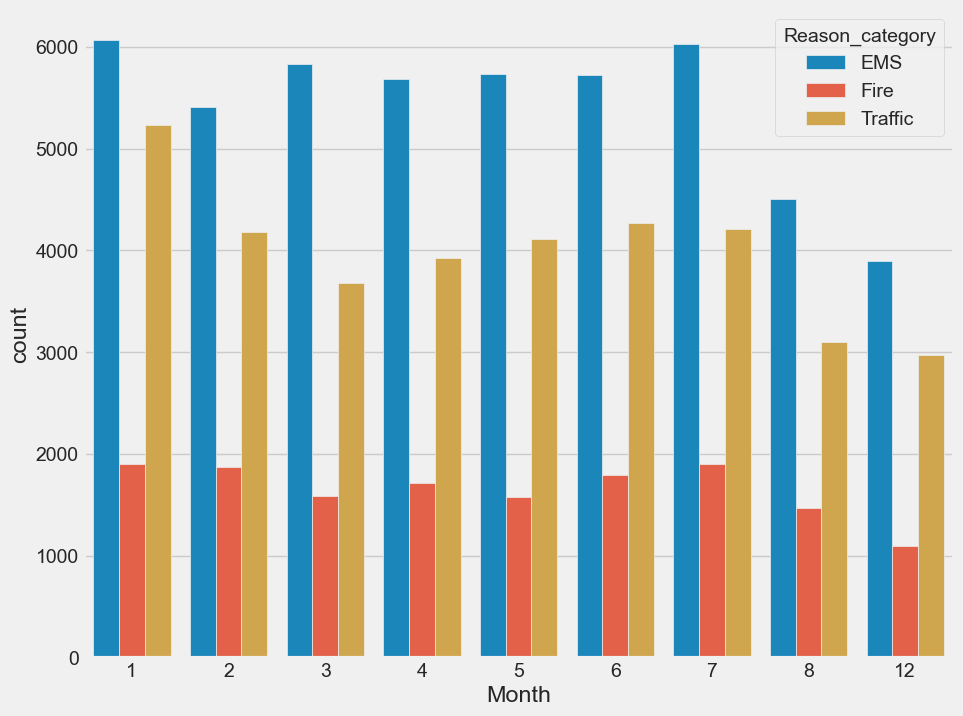

In [18]:
# Now WE do SAME for Month
plt.figure(figsize=(10, 8))
sns.countplot(x=data.Month, data=data, hue='Reason_category')

In [19]:
byMonth = data.groupby('Month').count()
byMonth=print(data.head())

   latitude  longitude  zipcode                    title           timestamp  \
0     40.30     -75.58 19525.00   EMS: BACK PAINS/INJURY 2015-12-10 17:40:00   
1     40.26     -75.26 19446.00  EMS: DIABETIC EMERGENCY 2015-12-10 17:40:00   
2     40.12     -75.35 19401.00      Fire: GAS-ODOR/LEAK 2015-12-10 17:40:00   
3     40.12     -75.34 19401.00   EMS: CARDIAC EMERGENCY 2015-12-10 17:40:01   
4     40.25     -75.60      NaN           EMS: DIZZINESS 2015-12-10 17:40:01   

            township                     address station_num Reason_category  \
0        NEW HANOVER      REINDEER CT & DEAD END         332             EMS   
1  HATFIELD TOWNSHIP  BRIAR PATH & WHITEMARSH LN         345             EMS   
2         NORRISTOWN                    HAWS AVE      :STA27            Fire   
3         NORRISTOWN          AIRY ST & SWEDE ST        308A             EMS   
4   LOWER POTTSGROVE    CHERRYWOOD CT & DEAD END         329             EMS   

                Reason  Hour  Month Da

In [20]:
dayHour = data.groupby(by=['DayOfWeek','Hour']).count()['Reason_category'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DayOfWeek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


<Axes: xlabel='Hour', ylabel='DayOfWeek'>

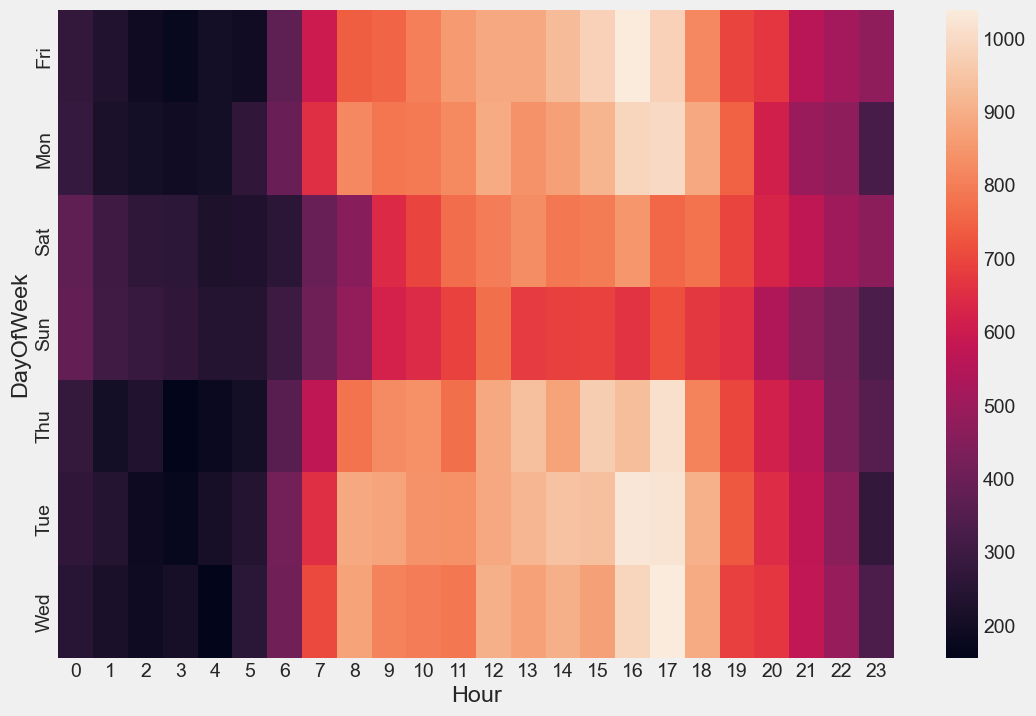

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(dayHour)

In [22]:
dayMonth = data.groupby(by=['DayOfWeek','Month']).count()['Reason_category'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
DayOfWeek,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<Axes: xlabel='Month', ylabel='DayOfWeek'>

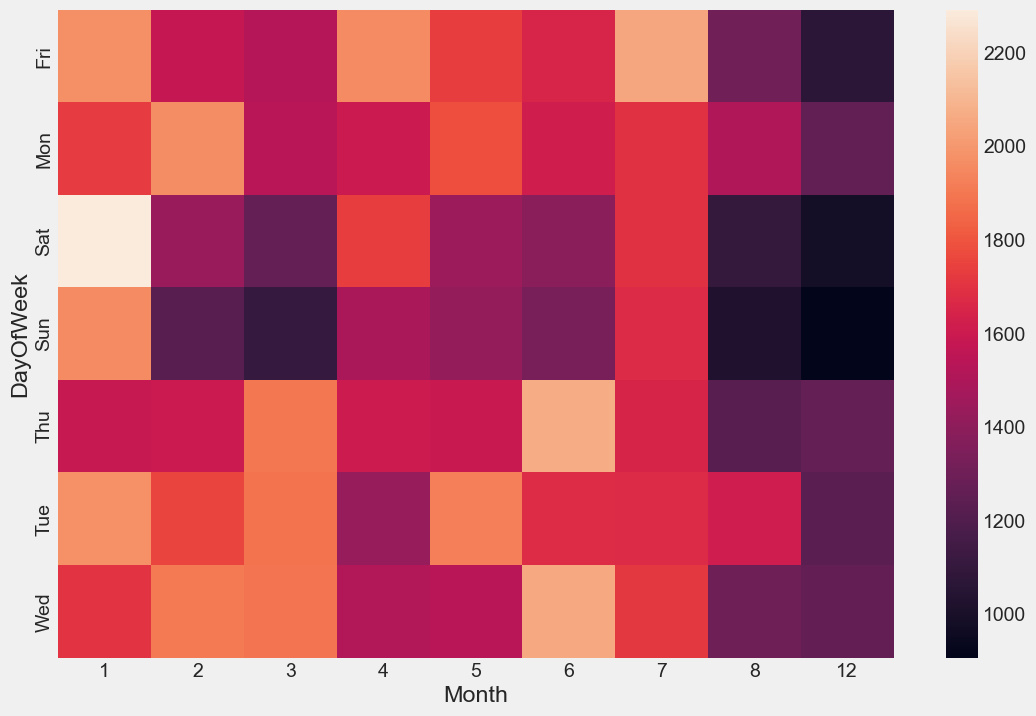

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(dayMonth)